# Plot flux gate locations

* **Description**: Plots map showing flux gate locations
* **Input data**: grid file
* **Output data**: PNG map
* **Creator**: Alice DuVivier
* **Date**: August 2022

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import pop_tools
from datetime import timedelta
import glob
import dask
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature


## Get aice data to use

In [2]:
# list the variables to load
varsneeded = ['aice']

#choose rufmod data paths
case1 = 'b.e21.BSSP370.f09_g17.rufmod.001'
# set base directory where all data live
data_dir = '/glade/campaign/cesm/development/pcwg/projects/arctic_cyclones/rufmod_expts/'
# set individual data directories
data_dir1 = data_dir+case1+'/ice/proc/tseries/month_1/'

#reading in files
ds1 = []
for var_in in varsneeded:
    print("loading "+var_in)   
    my_files=sorted(glob.glob(data_dir1+case1+'.cice.h.'+var_in+'.*.nc'))
    ds1.append(xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal'))


loading aice


In [3]:
print("Merging files now")
ds1=xr.merge(ds1,compat='override')

Merging files now


In [4]:
ds1

<xarray.Dataset>
Dimensions:      (nj: 384, ni: 320, time: 1032, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, d2: 2)
Coordinates:
    TLON         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULON         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time         (time) object 2015-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nj, ni, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/21)
    NCAT         (time, nc) float32 dask.array<chunksize=(600, 5), meta=np.ndarray>
    VGRDi        (time, nkice) float32 dask.array<chunksize=(600, 8), meta=np.ndarray>
    VGRDs        (time, nksnow) float32 dask.array<chunksize=(600, 3), meta=np.ndarray>
    VGRDb        (time, nkbio) float32 dask.array<chunksize=(600, 5), meta=np.ndarray>
    tmask        (time, nj, ni) float32 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    tarea        (time, nj, ni) float32 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ...           ...
    lont_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(600, 384, 320, 4), meta=np.ndarray>
    latt_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(600, 384, 320, 4), meta=np.ndarray>
    lonu_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(600, 384, 320, 4), meta=np.ndarray>
    latu_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(600, 384, 320, 4), meta=np.ndarray>
    time_bounds  (time, d2) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    aice         (time, nj, ni) float32 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BSSP370.f09_g17.rufmod.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 20150201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2021-07-14 at 12:33
    io_flavor:         io_pio

In [5]:
aice_tmp = ds1['aice'].isel(time=0)

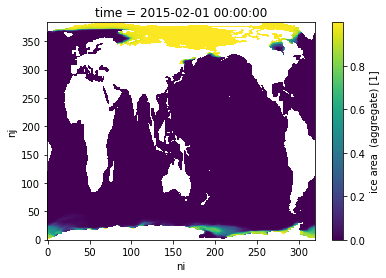

In [6]:
aice_tmp.plot()

In [7]:
ice_grid = aice_tmp.where(aice_tmp == 1, other=1)

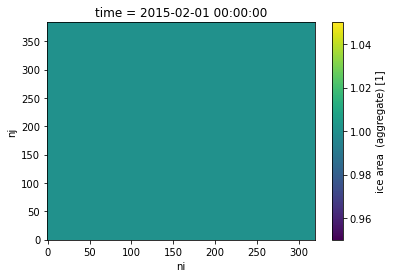

In [8]:
ice_grid.plot()

In [9]:
ice_grid = ice_grid.where(aice_tmp>=0)

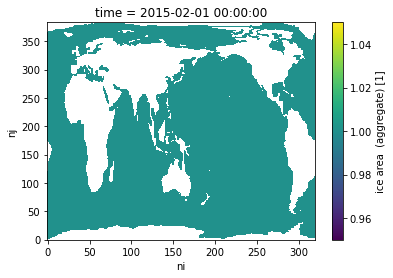

In [10]:
ice_grid.plot()

In [11]:
ice_grid

<xarray.DataArray 'aice' (nj: 384, ni: 320)>
dask.array<where, shape=(384, 320), dtype=float32, chunksize=(384, 320), chunktype=numpy.ndarray>
Coordinates:
    TLON     (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    time     object 2015-02-01 00:00:00
Dimensions without coordinates: nj, ni
Attributes:
    units:          1
    long_name:      ice area  (aggregate)
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged

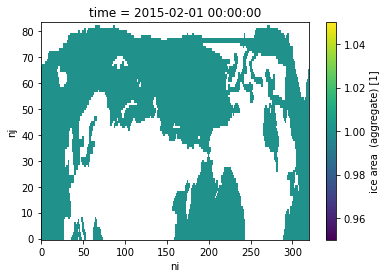

In [12]:
ice_grid.isel(nj=slice(300,384)).plot()

## Select just flux gate points

In [13]:
# Bering flux gate
# Indices from Marika: i=198:199, j=331

# Indices we're using
ii_ber_min = 199
ii_ber_max = 201
jj_ber  = 332

# Just the flux gate
data_ber = ice_grid.loc[jj_ber,ii_ber_min:ii_ber_max]

In [14]:
# Just look at Fram and Barents gates
# Indices from Marika: Fram i=99, j=370:379; Barents i=99, j=351:365

# fram strait
ii_fram     = 100
jj_fram_min = 369
jj_fram_max = 381

# barents sea
ii_bar      = 85
jj_bar_min  = 345
jj_bar_max  = 367

# central arctic
ii_cen      = 135
jj_cen_min  = 355
jj_cen_max  = 378

# Just the flux gates
data_fram = ice_grid.loc[jj_fram_min:jj_fram_max,ii_fram]
data_bar  = ice_grid.loc[jj_bar_min:jj_bar_max,ii_bar]
data_cen  = ice_grid.loc[jj_cen_min:jj_cen_max,ii_cen]

## Plot mask

In [15]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

Text(0.5, 1.0, 'Ice model grid and flux gates')

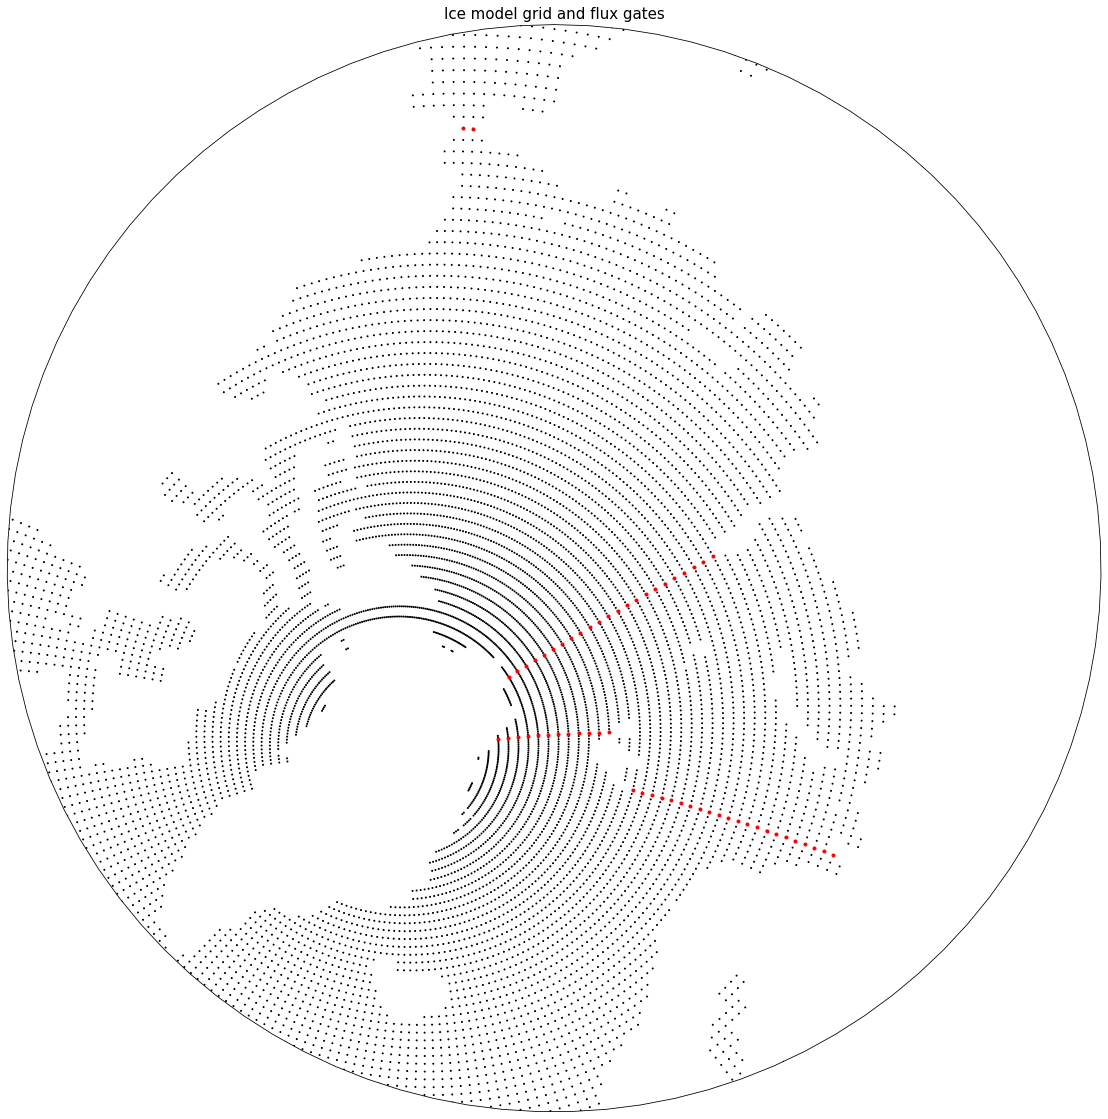

In [16]:
# Want to plot the mask
fig = plt.figure(figsize=(20,20))

ax = plt.subplot(1,1,1,projection = ccrs.NorthPolarStereo() )
#ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([0.005, 360, 90, 60], crs=ccrs.PlateCarree())

# do scatter plot of all values
cs1 = ax.scatter(ice_grid.TLON.values, ice_grid.TLAT.values, 
                 ice_grid,
                 c='black',marker='o',
                 transform=ccrs.PlateCarree())
# add flux gate points in red
# Bering Strait
ax.scatter(data_ber.TLON.values, data_ber.TLAT.values, 
           c='red', marker='.',
           transform=ccrs.PlateCarree())
# Fram Strait
ax.scatter(data_fram.TLON.values, data_fram.TLAT.values, 
           c='red', marker='.',
           transform=ccrs.PlateCarree())
# Barents Sea
ax.scatter(data_bar.TLON.values, data_bar.TLAT.values, 
           c='red', marker='.',
           transform=ccrs.PlateCarree())
# Central Arctic
ax.scatter(data_cen.TLON.values, data_cen.TLAT.values, 
           c='red', marker='.',
           transform=ccrs.PlateCarree())


ax.set_title("Ice model grid and flux gates", fontsize=15)
#fig = plt.savefig('flux_gates.png', bbox_inches='tight', dpi=200)

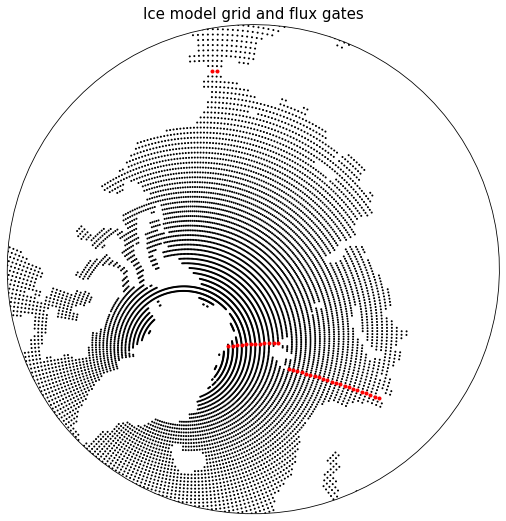

In [17]:
# Want to plot the mask
fig = plt.figure(figsize=(12,9))

ax = plt.subplot(1,1,1,projection = ccrs.NorthPolarStereo() )
#ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([0.005, 360, 90, 60], crs=ccrs.PlateCarree())

# do scatter plot of all values
cs1 = ax.scatter(ice_grid.TLON.values, ice_grid.TLAT.values, 
                 ice_grid,
                 c='black',marker='o',
                 transform=ccrs.PlateCarree())
# add flux gate points in red
# Bering Strait
ax.scatter(data_ber.TLON.values, data_ber.TLAT.values, 
           c='red', marker='.',
           transform=ccrs.PlateCarree())
# Fram Strait
ax.scatter(data_fram.TLON.values, data_fram.TLAT.values, 
           c='red', marker='.',
           transform=ccrs.PlateCarree())
# Barents Sea
ax.scatter(data_bar.TLON.values, data_bar.TLAT.values, 
           c='red', marker='.',
           transform=ccrs.PlateCarree())

ax.set_title("Ice model grid and flux gates", fontsize=15)
fig = plt.savefig('flux_3_gates.png', bbox_inches='tight', dpi=200)

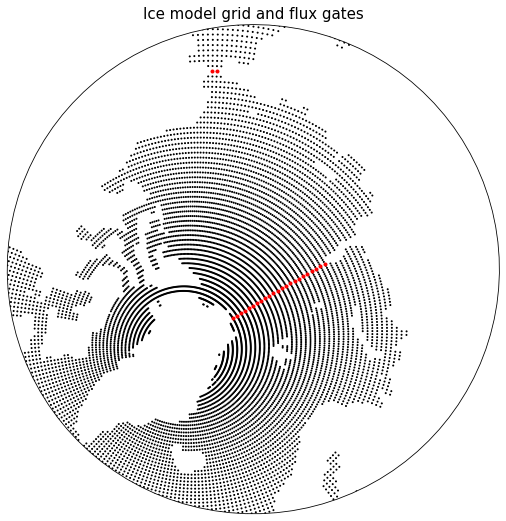

In [18]:
# Want to plot the mask
fig = plt.figure(figsize=(12,9))

ax = plt.subplot(1,1,1,projection = ccrs.NorthPolarStereo() )
#ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([0.005, 360, 90, 60], crs=ccrs.PlateCarree())

# do scatter plot of all values
cs1 = ax.scatter(ice_grid.TLON.values, ice_grid.TLAT.values, 
                 ice_grid,
                 c='black',marker='o',
                 transform=ccrs.PlateCarree())
# add flux gate points in red
# Bering Strait
ax.scatter(data_ber.TLON.values, data_ber.TLAT.values, 
           c='red', marker='.',
           transform=ccrs.PlateCarree())
# Central Arctic
ax.scatter(data_cen.TLON.values, data_cen.TLAT.values, 
           c='red', marker='.',
           transform=ccrs.PlateCarree())

ax.set_title("Ice model grid and flux gates", fontsize=15)
fig = plt.savefig('flux_2_gates.png', bbox_inches='tight', dpi=200)